In [50]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE,mean_squared_error as MSE, r2_score as R2
scaling = StandardScaler()
LRN = LinearRegression()
ridge = Ridge(alpha=.4)
lasso = Lasso(alpha=0.001)
pd.set_option("display.max_columns", None)

In [51]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [52]:
df.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [53]:
df["date"] = pd.to_datetime(df.date, infer_datetime_format=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [55]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [56]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [57]:
df = df.drop(columns=["date","lights"])

In [58]:
reg_df = df[["T2","T6"]].sample(15, random_state =70)
reg_df1 = df[["T2","Appliances"]].sample(15, random_state = 60)
reg_df2 = df[["T6","Appliances"]].sample(15, random_state = 42)

<AxesSubplot:xlabel='T2', ylabel='T6'>

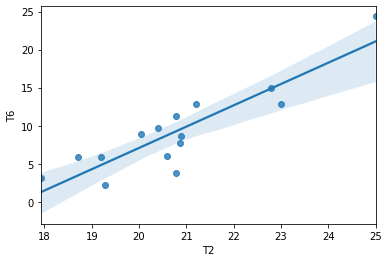

In [59]:
sns.regplot(x="T2", y="T6", data=reg_df)

<AxesSubplot:xlabel='T2', ylabel='Appliances'>

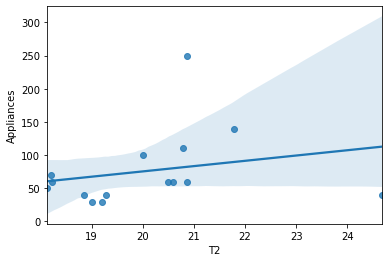

In [60]:
sns.regplot(x="T2", y="Appliances", data=reg_df1)

<AxesSubplot:xlabel='T6', ylabel='Appliances'>

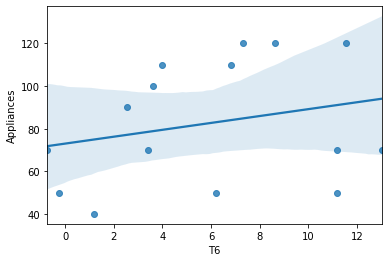

In [61]:
sns.regplot(x="T6", y="Appliances", data=reg_df2)

In [62]:
refined_df = pd.DataFrame(scaling.fit_transform(df), columns=df.columns)

In [63]:
refined_df.head(2)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.367676,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,0.47116,-0.145196,0.951798,-1.453646,1.219861,-1.957509,1.141572,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-0.367676,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,0.47116,-0.176941,0.945592,-1.453646,1.206825,-1.957509,1.134554,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135,-0.440240,-0.440240


In [64]:
defined_df = refined_df.drop(columns='Appliances')

In [65]:
defined_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,0.471160,-0.145196,0.951798,-1.453646,1.219861,-1.957509,1.141572,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,0.471160,-0.176941,0.945592,-1.453646,1.206825,-1.957509,1.134554,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,-1.314903,0.458968,-0.221822,0.916484,-1.453646,1.182057,-1.957509,1.109032,-1.233869,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294,0.252109,0.252109
3,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,-1.314903,0.458968,-0.242621,0.925045,-1.485243,1.154030,-2.008631,1.082233,-1.233869,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454,1.408801,1.408801
4,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,-1.296832,0.458968,-0.253567,0.972238,-1.453646,1.142298,-2.008631,1.082233,-1.233869,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613,-1.028122,-1.028122


In [66]:
dropped_df = refined_df.Appliances

In [67]:
dropped_df

0       -0.367676
1       -0.367676
2       -0.465215
3       -0.465215
4       -0.367676
           ...   
19730    0.022483
19731   -0.075056
19732    1.680659
19733    3.143756
19734    3.241295
Name: Appliances, Length: 19735, dtype: float64

In [68]:
x_train, x_test, y_train, y_test = split(defined_df.T2.values.reshape(-1,1),defined_df.T6, test_size=.3,random_state=35)

In [69]:
modelling = LRN.fit(x_train,y_train)

In [70]:
modelling

LinearRegression()

In [71]:
pred_values = LRN.predict(x_test)

In [72]:
LRN.score(x_test,y_test)

0.6501545210343389

In [73]:
mae = MAE(y_test,pred_values)
mae

0.4578502714413991

In [74]:
rmse = np.sqrt(MSE(y_test,pred_values))
rmse

0.5915977326358178

In [75]:
r2 = R2(y_test,pred_values)
r2

0.6501545210343389

In [76]:
coefficient = metrics.r2_score(y_test,pred_values)
coefficient

0.6501545210343389

In [77]:
defined_df = refined_df.drop(columns='Appliances')
dropped_df = refined_df.Appliances
x1_train, x1_test, y1_train, y1_test = split(defined_df, dropped_df, test_size=0.3, random_state=42)
LM1 = LinearRegression()
LM1.fit(x1_train, y1_train)

LinearRegression()

In [78]:
ridge.fit(x1_train, y1_train)

Ridge(alpha=0.4)

In [79]:
lasso.fit(x1_train,y1_train)

Lasso(alpha=0.001)

In [80]:
predicted_val = LM1.predict(x1_test)

In [81]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

In [82]:
linear_model = get_weights_df(LM1, x1_train , 'Linear_Model_Weight')
linear_model.sort_values(by='Linear_Model_Weight', ascending=True)

,Features,Linear_Model_Weight
0,T_out,-0.574329
1,RH_2,-0.545451
2,T9,-0.415587
3,T2,-0.392929
4,RH_8,-0.294473
5,RH_out,-0.158934
6,RH_7,-0.084441
7,RH_9,-0.071375
8,T5,-0.028802
9,T1,-0.005807


In [83]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x1_train, y1_train)

Ridge(alpha=0.4)

In [84]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x1_train, y1_train)

Lasso(alpha=0.001)

In [85]:
predicted_values = ridge_reg.predict(x1_test)

In [86]:
RMSE_ridge = round(np.sqrt(metrics.mean_squared_error(y1_test, predicted_values)),3)
RMSE_linear = round(np.sqrt(metrics.mean_squared_error(y1_test, predicted_val)),3)

In [87]:
RMSE_ridge

0.913

In [88]:
RMSE_linear

0.913

In [89]:
lasso_weights = get_weights_df(lasso_reg, x1_train,"Lasso_Model_Weights")
lasso_weights[(lasso_weights["Lasso_Model_Weights"] < 0) | (lasso_weights["Lasso_Model_Weights"] > 0)].count()

Features               24
Lasso_Model_Weights    24
dtype: int64

In [90]:
predict1 = lasso_reg.predict(x1_test)
RMSE_lasso = round(np.sqrt(metrics.mean_squared_error(y1_test, predict1)),3)

In [91]:
RMSE_lasso

0.914